In [1]:
#CNN - Brain Tumor
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
#initialising the CNN
classifier = Sequential()

In [3]:
#step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
#step 2 - Max Pooling(dimension of pooling is always half the size of the feature map)
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
#step 3 - Flattening(it is done to gain information about the spatial structure of the picture)
classifier.add(Flatten())

In [6]:
#step 4 - Full Connection(ANN)
classifier.add(Dense(128, activation = 'relu'))     #hidden layer
classifier.add(Dense(1, activation = 'sigmoid'))     #output layer

In [7]:
#compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
#fitting CNN to the images
from keras.preprocessing.image import ImageDataGenerator

In [9]:
#image augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
#mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Machine Learning/DATASETS/Projects/Brain Tumor Dataset'  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
#creating training set
training_set = '/content/gdrive/MyDrive/Machine Learning/DATASETS/PROJECTS/Brain Tumor Dataset/Brain Tumor Dataset/Train set'
training_set = train_datagen.flow_from_directory(training_set,
                                                 target_size = (64, 64),#target size dimensions are 64 and 64 as mentioned in step 1
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 227 images belonging to 2 classes.


In [13]:
#creating test set
test_set = '/content/gdrive/MyDrive/Machine Learning/DATASETS/PROJECTS/Brain Tumor Dataset/Brain Tumor Dataset/Test set'
test_set = test_datagen.flow_from_directory(test_set,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary') 

Found 26 images belonging to 2 classes.


In [14]:
#fitting the model
classifier.fit(training_set,#fits the model to the data
               steps_per_epoch = 7,#no. of images in training set
               epochs = 70,
               validation_data = test_set,
               validation_steps = 7)#no. of images in test set

Epoch 1/70
7/7 [==============================] - 1s 140ms/step - loss: 0.6248 - accuracy: 0.5846 - val_loss: 0.6053 - val_accuracy: 0.8077
Epoch 2/70
7/7 [==============================] - 1s 119ms/step - loss: 0.6001 - accuracy: 0.6964
Epoch 3/70
7/7 [==============================] - 1s 98ms/step - loss: 0.5322 - accuracy: 0.7538
Epoch 4/70
7/7 [==============================] - 1s 101ms/step - loss: 0.5298 - accuracy: 0.7641
Epoch 5/70
7/7 [==============================] - 1s 119ms/step - loss: 0.5315 - accuracy: 0.7411
Epoch 6/70
7/7 [==============================] - 1s 117ms/step - loss: 0.5927 - accuracy: 0.6786
Epoch 7/70
7/7 [==============================] - 1s 100ms/step - loss: 0.5744 - accuracy: 0.7231
Epoch 8/70
7/7 [==============================] - 1s 118ms/step - loss: 0.5581 - accuracy: 0.7054
Epoch 9/70
7/7 [==============================] - 1s 92ms/step - loss: 0.5279 - accuracy: 0.7231
Epoch 10/70
7/7 [==============================] - 1s 103ms/step - loss: 0.530

Saving no_tumor1.jpeg to no_tumor1 (6).jpeg
[0.]


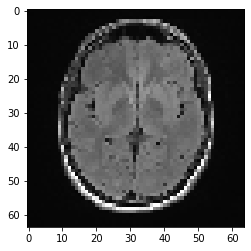

no_tumor1.jpeg has no tumor


In [15]:
import numpy as np
%matplotlib inline
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()
for fn in uploaded.keys(): 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = classifier.predict(images, batch_size=10)
  print(classes[0])
  plt.imshow(img)
  plt.show()
  if classes[0]>0.5:
    print(fn + " has a tumor")
  else:
    print(fn + " has no tumor")

Saving tumor1.jpg to tumor1 (4).jpg
[1.]


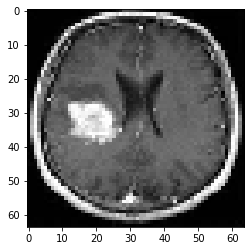

tumor1.jpg has a tumor


In [16]:
uploaded = files.upload()
for fn in uploaded.keys(): 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = classifier.predict(images, batch_size=10)
  print(classes[0])
  plt.imshow(img)
  plt.show()
  if classes[0]>0.5:
    print(fn + " has a tumor")
  else:
    print(fn + " has no tumor")

Saving no_tumor2.jpg to no_tumor2 (4).jpg
[0.]


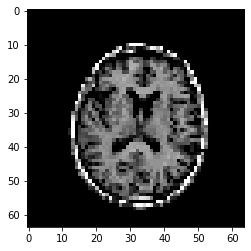

no_tumor2.jpg has no tumor


In [17]:
uploaded = files.upload()
for fn in uploaded.keys(): 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = classifier.predict(images, batch_size=10)
  print(classes[0])
  plt.imshow(img)
  plt.show()
  if classes[0]>0.5:
    print(fn + " has a tumor")
  else:
    print(fn + " has no tumor")

Saving tumor2.png to tumor2 (4).png
[1.]


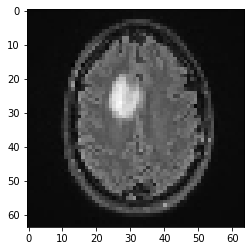

tumor2.png has a tumor


In [18]:
uploaded = files.upload()
for fn in uploaded.keys(): 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(64, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = classifier.predict(images, batch_size=10)
  print(classes[0])
  plt.imshow(img)
  plt.show()
  if classes[0]>0.5:
    print(fn + " has a tumor")
  else:
    print(fn + " has no tumor")